In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (GridSearchCV,train_test_split)
from sklearn.preprocessing import (StandardScaler,OneHotEncoder,LabelEncoder)
from sklearn.linear_model import (LinearRegression,LogisticRegression)
from sklearn.tree import (DecisionTreeClassifier)


In [3]:
print(tf.__version__)

2.20.0


In [4]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# perform EDA

In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


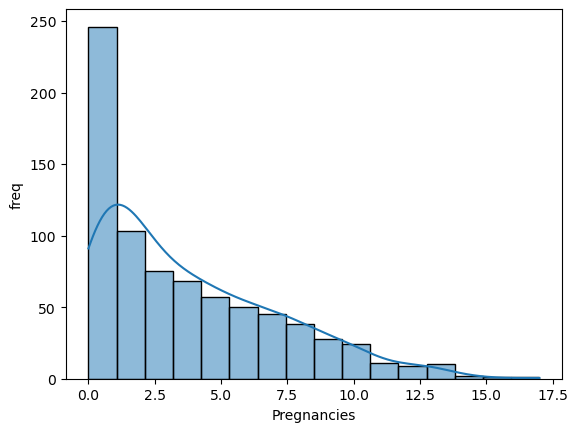

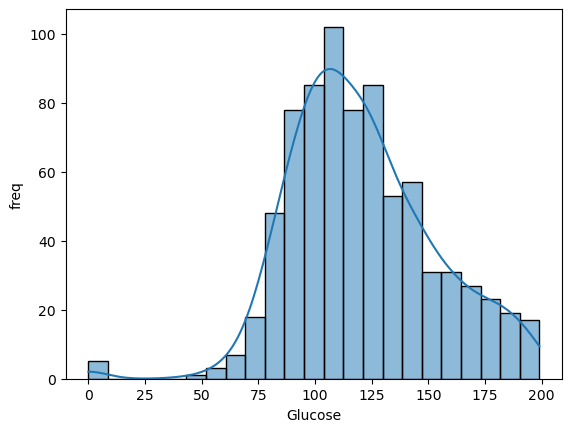

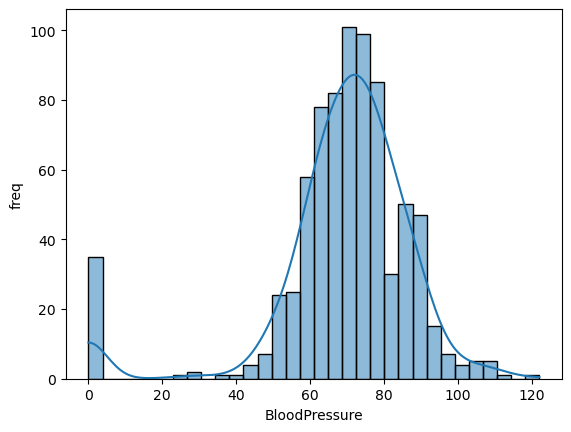

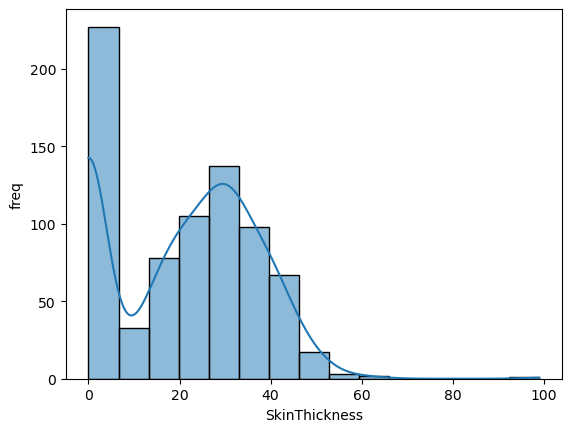

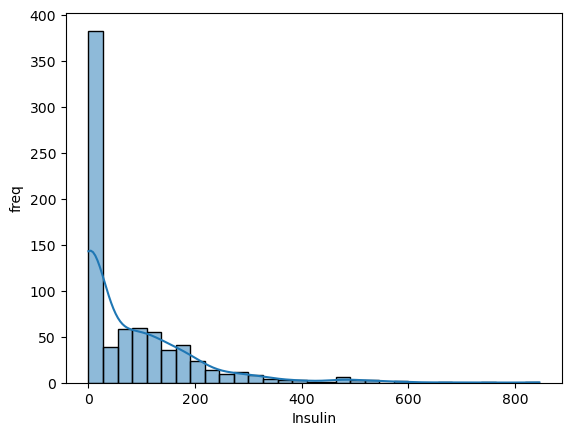

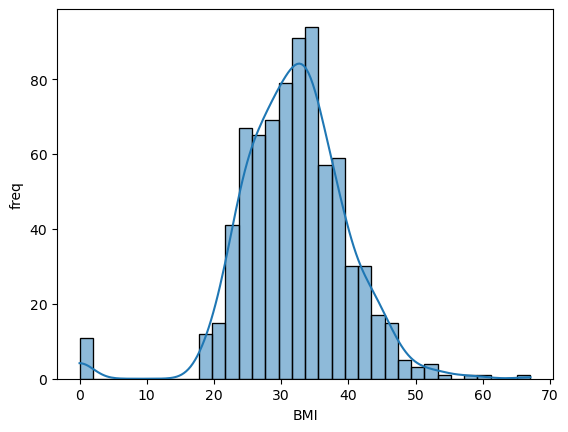

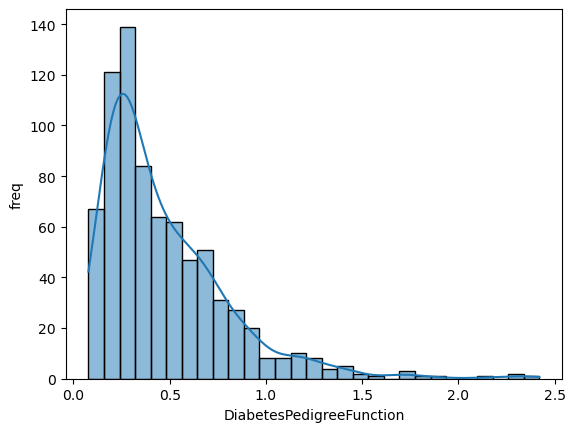

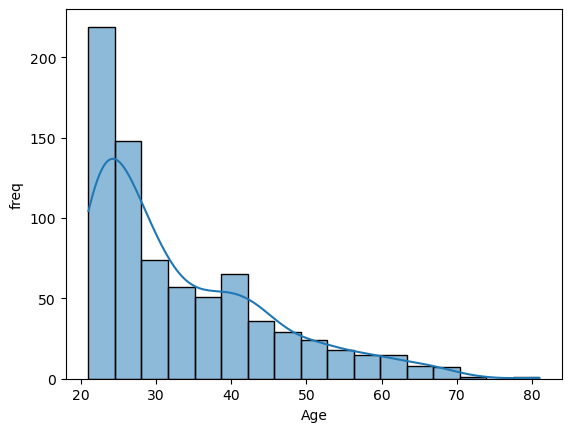

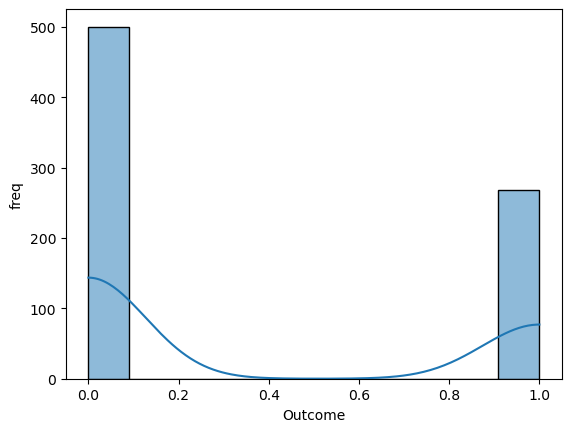

In [8]:
numerical_cols=df.select_dtypes(include='number')
for cols in numerical_cols:
    sns.histplot(df[cols],kde=True)
    plt.xlabel(cols)
    plt.ylabel('freq')
    plt.show()

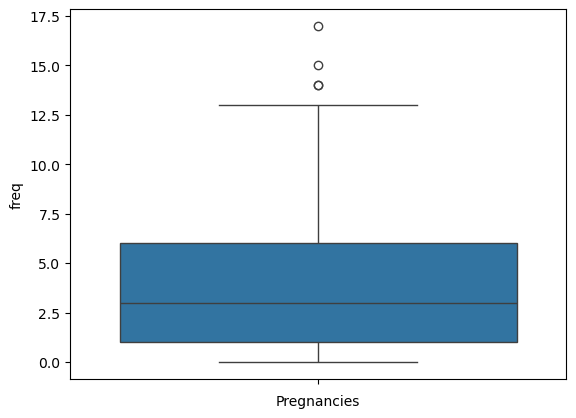

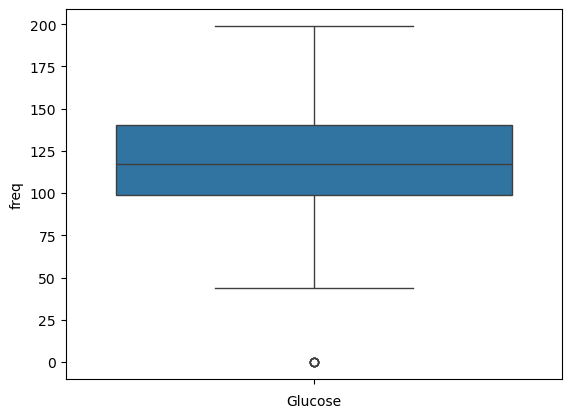

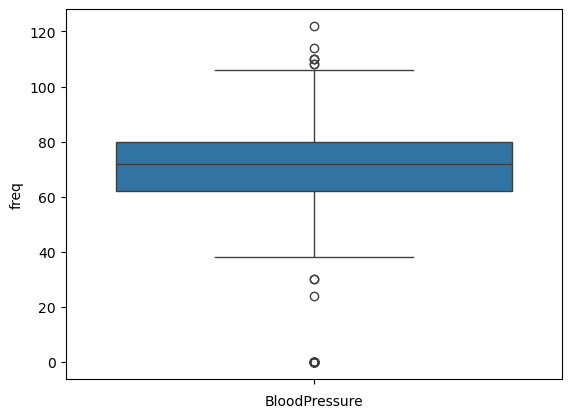

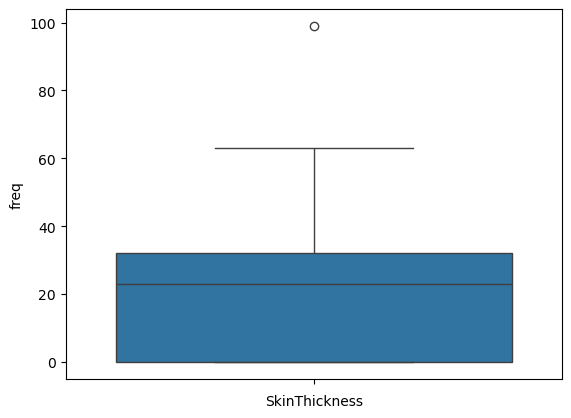

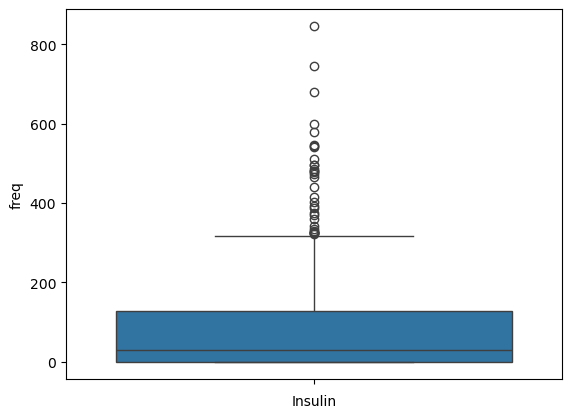

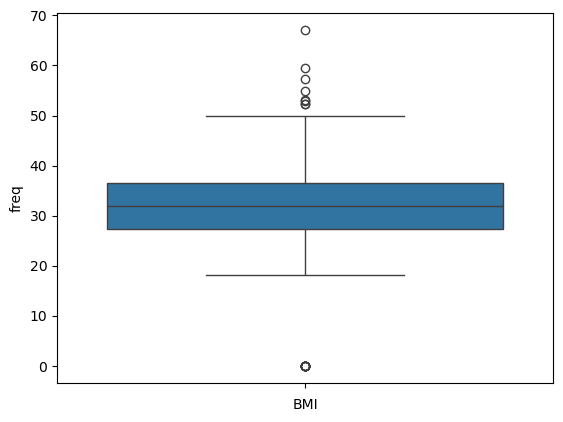

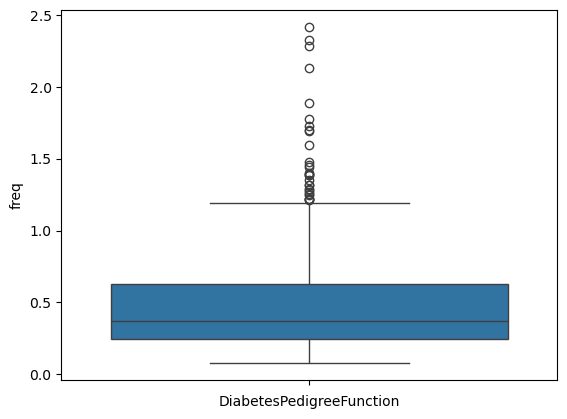

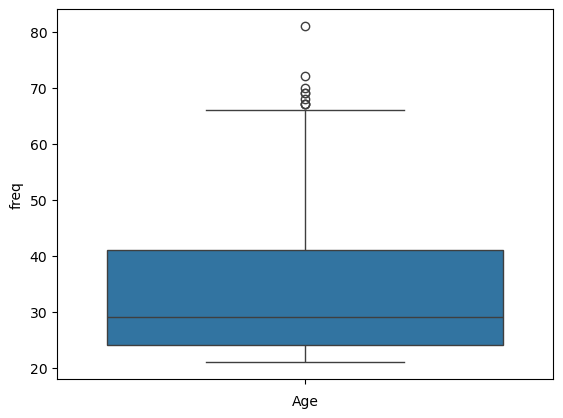

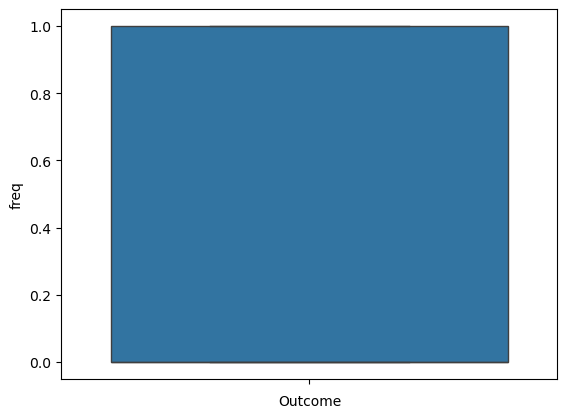

In [9]:
# plot boxplot for outliers
for cols in numerical_cols:
    sns.boxplot(df[cols])
    plt.xlabel(cols)
    plt.ylabel('freq')
    plt.show()

In [10]:
# I want to treat only Insulin,pedigree
numerical_names=df.select_dtypes(include='number').columns
for col in ['Insulin','DiabetesPedigreeFunction']:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
    lower_bound=Q1-1.5*iqr
    upper_bound=Q3+1.5*iqr
    df[col]=df[col].clip(lower=lower_bound,upper=upper_bound)

# Model Preparation 

In [13]:
X=df.iloc[:,0:8]
y=df.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)
print(X_train.shape)
print(y_train.shape)

(614, 8)
(614,)


In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0.0,33.6,0.627,50
1,1,85,66,29,0.0,26.6,0.351,31
2,8,183,64,0,0.0,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,1.200,33


In [33]:
#Standardise dataframe
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU,Dropout
from keras import regularizers

In [35]:
model=Sequential()
model.add(Dense(units=32,activation='relu',input_dim=8))
Dropout(0.2)
model.add(Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
Dropout(0.3)
model.add(Dense(units=8,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
Dropout(0.2)
model.add(Dense(units=1,activation='sigmoid'))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# compile model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
early_binding=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [38]:
model_hist1=model.fit(X_train,y_train,validation_split=0.2,epochs=500,callbacks=early_binding)

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3442 - loss: 0.8382 - val_accuracy: 0.4228 - val_loss: 0.7581
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4481 - loss: 0.7577 - val_accuracy: 0.5691 - val_loss: 0.7191
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6029 - loss: 0.7196 - val_accuracy: 0.6911 - val_loss: 0.7016
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6660 - loss: 0.6987 - val_accuracy: 0.7154 - val_loss: 0.6870
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7230 - loss: 0.6804 - val_accuracy: 0.7480 - val_loss: 0.6701
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7495 - loss: 0.6598 - val_accuracy: 0.7317 - val_loss: 0.6474
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7556 - loss: 0.6323 - val_accuracy: 0.7317 - val_loss: 0.6199
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7739 - loss: 0.5988 - val_accuracy: 0.7398 - 

In [39]:
# predict modeling
y_pred=model.predict(X_test)
y_pred=(y_pred>=0.5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [40]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy_score:-",accuracy_score(y_test,y_pred))
print("Classification Report:-",classification_report(y_test,y_pred))

Accuracy_score:- 0.7727272727272727
Classification Report:-               precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

